# Text Analysis

In this module, we will use the Natural Language Toolkit Library (NLTK) to look at individual words and sentences in a text and clean unneccessary features from the text data to prepare for sentiment analysis. Then using the textblob library, we will analyze the sentiment of opinioned data to give a numerical value for use in a predictive model.

#### Tokenizing Words and Sentences

Recall in the "Python Dictionaries and String Manipulation" notebook, we used the .split() function to break a sentence apart.

In [1]:
text = "My favorite color is purple"
text.split()

['My', 'favorite', 'color', 'is', 'purple']

However, because the default character to split on is a space, the .split() function does not work well with sentences that have punctuation.

In [2]:
#the comma is attached to the previous word
text2 = "My favorite foods are french fries, bacon, and cheese"
text2.split()

['My',
 'favorite',
 'foods',
 'are',
 'french',
 'fries,',
 'bacon,',
 'and',
 'cheese']

The NLTK library was built to separate punctuation from words when tokenizing (splitting into parts).

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#this is sample data
from nltk.corpus import names  

from string import punctuation

#if the next cell does not work
#remove number symbol on following lines and re-run this cell
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('names')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GBTC408015ur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GBTC408015ur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\GBTC408015ur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GBTC408015ur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GBTC408015ur\AppData\Roaming\nltk_data...


True

In [6]:
#the comma is now its own token when the sentence is split
word_tokenize(text2)

['My',
 'favorite',
 'foods',
 'are',
 'french',
 'fries',
 ',',
 'bacon',
 ',',
 'and',
 'cheese']

In [7]:
#muti-sentence texts can be tokenized by sentence
#each sentence is an item in the list
text3 = "My name is Kenisha Priester. My favorite color is purple. My favorite foods are french fries, bacon, and cheese."

sent_tokenize(text3)

['My name is Kenisha Priester.',
 'My favorite color is purple.',
 'My favorite foods are french fries, bacon, and cheese.']

A lot of social media data is in the form of tweets. A tweet can have an @ sign to tag another user or a # sign to tag a particular subject. When analyzing data, you may want to retain these symbols with the words/phrase they're attached to.

In [8]:
#tweets are more difficult to use the word tokenize function on
#using word_tokenize, common social media signs get separated
tweet = "@animegurl OMG you are so #funny :P"

word_tokenize(tweet)

['@', 'animegurl', 'OMG', 'you', 'are', 'so', '#', 'funny', ':', 'P']

In [9]:
#keeps the @ sign, # sign, and the tongue-out emoji
TweetTokenizer().tokenize(tweet)

['@animegurl', 'OMG', 'you', 'are', 'so', '#funny', ':P']

#### Remember the Word Count exercise text?

Let's clean it up using NLTK and do a basic analysis.

In [10]:
#work count exercise paragraph
wctext = '''
A CerTaiN kING HaD a bEaUtIFul gaRDEn, ANd IN THe GarDen StooD A trEe
whICH bORe GoLDeN ApPlEs. THesE aPples WerE alwAyS CoUntEd, aNd abOuT
tHE TiMe WheN tHEY BEgAn tO grow RipE IT wAs foUND THat EVeRY NIgHT ONE
OF THeM Was gOne. thE kiNg bECAMe veRy ANGRy at thiS, aND ORDEred the
GarDEneR TO KEeP WAtch ALL NIgHT uNDER the tREE. tHE gardener sEt hIs
ELdEsT SoN to WATCH; buT ABout TweLve O'clOCK He fELL ASlEEp, And in
the morNIng aNOTheR Of thE aPPLes Was mIssinG. tHEn THE sECONd Son waS
oRdERED to waTch; aNd AT mIDniGhT he tOO FELl ASleEP, aND iN thE mOrNIng
ANoThER AppLE WaS gOne . TheN THe thIrd Son oFfeREd tO KeEp wATCh; buT
thE garDENer At First WoULd NoT LET Him, FOr fEaR sOMe HArM ShOuLD cOME
To hIM: hoWeveR, at lAST hE coNSEnteD, AND tHE YouNg MAN laID HimSELf
uNDER tHE tREe TO wAtch. AS tHE clocK STRuCk tweLvE He Heard A rustlinG
NoISe IN ThE aIr, And a biRd CAME FlYing ThAt was Of PUre gOLd; AND as
IT WAs SNApPING At onE oF ThE aPpleS wIth iTS BeaK, tHE GArDEner’S son
jUMpED UP And SHOT AN aRrOw at iT. But THE arrOw DID thE BiRD nO HaRm;
ONlY iT dRoPPEd a GoLDEn FEather FROM iTS tAiL, aND THEN FLEw AwaY.
the gOLdEN FEAthER WAS bRoUght to THe KinG IN THE MOrNING, AnD aLL ThE
cOunCil WAs called TogETHER. EVERYoNE aGREed ThAt it wAS wORth MoRe THAn
aLl The weAltH Of tHE kIngDOm: But THE KiNg sAID, ‘One FeatHeR Is Of NO
use tO me, I MusT HaVE ThE wHOLE BIRD .’
'''

In [11]:
#first, change all the words to lowercase
wctext = wctext.lower()

#then tokenize each part of the text
tknz_wct = word_tokenize(wctext)

In [12]:
tknz_wct[:5]

['a', 'certain', 'king', 'had', 'a']

In [13]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct = FreqDist(tknz_wct)
fd_wct

FreqDist({',': 14,
          '.': 10,
          ':': 2,
          ';': 5,
          'a': 6,
          'about': 2,
          'agreed': 1,
          'air': 1,
          'all': 3,
          'always': 1,
          'an': 1,
          'and': 12,
          'angry': 1,
          'another': 2,
          'apple': 1,
          'apples': 4,
          'arrow': 2,
          'as': 2,
          'asleep': 2,
          'at': 6,
          'away': 1,
          'beak': 1,
          'beautiful': 1,
          'became': 1,
          'began': 1,
          'bird': 3,
          'bore': 1,
          'brought': 1,
          'but': 4,
          'called': 1,
          'came': 1,
          'certain': 1,
          'clock': 1,
          'come': 1,
          'consented': 1,
          'council': 1,
          'counted': 1,
          'did': 1,
          'dropped': 1,
          'eldest': 1,
          'every': 1,
          'everyone': 1,
          'fear': 1,
          'feather': 3,
          'fell': 2,
          'first': 1,


In [14]:
#shows the top 10 words in the text
fd_wct.most_common(10)

[('the', 28),
 (',', 14),
 ('and', 12),
 ('.', 10),
 ('was', 10),
 ('to', 9),
 ('a', 6),
 ('of', 6),
 ('at', 6),
 ('in', 5)]

The most common parts of this text seem to be filler words and punctuation. We need to remove them to get a better understand of what the text is about.

In [15]:
#number of tokens in list before puntuation removal
len(tknz_wct)

305

In [16]:
#remove the puntuation tokens from the list
for word in tknz_wct:
    if word in punctuation:
        tknz_wct.remove(word)

In [17]:
#number of tokens in list after puntuation removal
len(tknz_wct)

274

In [18]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
#list of english stopwords
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
tknz_wct[:10]

['a', 'certain', 'king', 'had', 'a', 'beautiful', 'garden', 'and', 'in', 'the']

In [22]:
rm_count = 0
new_words = []  #list to hold new words

for word in tknz_wct:
    if word not in eng_stopwords:
        new_words.append(word)
    else: rm_count += 1

In [23]:
rm_count

145

In [24]:
len(new_words)

129

Now let's see the new top 10 words in this text.

In [25]:
fd_nw = FreqDist(new_words)
fd_nw.most_common(10)

[('watch', 5),
 ('king', 4),
 ('apples', 4),
 ('gardener', 4),
 ('son', 4),
 ('tree', 3),
 ('golden', 3),
 ('one', 3),
 ('morning', 3),
 ('bird', 3)]

Words in Enlgish can change their form depending on if it's past tense, present tense, or future tense. We can reduce these words to their dictionary form so that it's easier for the computer to interpret the words. This is called **lemmatization**.

In [26]:
#put the word lemmatization function into a variable
wnl = WordNetLemmatizer()

In [27]:
#this sentence contains words with different tenses
sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

In [28]:
#tokenize the sentence into a list
#this is before we lemmatize it
non_lem = word_tokenize(sentence)
non_lem

['He',
 'was',
 'running',
 'and',
 'eating',
 'at',
 'same',
 'time',
 '.',
 'He',
 'has',
 'bad',
 'habit',
 'of',
 'swimming',
 'after',
 'playing',
 'long',
 'hours',
 'in',
 'the',
 'Sun',
 '.']

In [29]:
#empty list to hold the new lemmatized words
lemm = []

for word in non_lem:
    lemm.append(wnl.lemmatize(word, pos="v"))  #lemmatize using 'verb' part-of-speech

In [30]:
#this is the list of tokens after being lemmatized
lemm

['He',
 'be',
 'run',
 'and',
 'eat',
 'at',
 'same',
 'time',
 '.',
 'He',
 'have',
 'bad',
 'habit',
 'of',
 'swim',
 'after',
 'play',
 'long',
 'hours',
 'in',
 'the',
 'Sun',
 '.']

#### Visual analysis of last letter of male and female names

In [31]:
#there are two text files within the Names sample data
names.fileids()

['female.txt', 'male.txt']

In [32]:
#tokenize the words in the text to lists
m_names = names.words('male.txt')
f_names = names.words('female.txt')

In [33]:
#sample the first 5 items in m_names
m_names[:5]

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot']

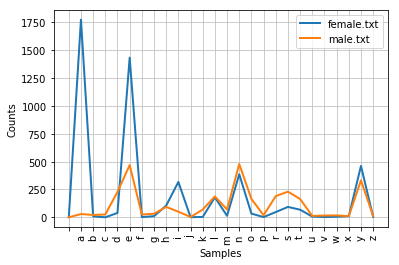

In [34]:
#make a frequency distribution of names that end with a particular letter (by gender)
cfd = nltk.ConditionalFreqDist(
            (fileid, name[-1])
            for fileid in names.fileids()
            for name in names.words(fileid))

cfd.plot()

In [35]:
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'female.txt': FreqDist({' ': 1,
                               'a': 1773,
                               'b': 9,
                               'd': 39,
                               'e': 1432,
                               'f': 2,
                               'g': 10,
                               'h': 105,
                               'i': 317,
                               'j': 1,
                               'k': 3,
                               'l': 179,
                               'm': 13,
                               'n': 386,
                               'o': 33,
                               'p': 2,
                               'r': 47,
                               's': 93,
                               't': 68,
                               'u': 6,
                               'v': 2,
                               'w': 5,
                               'x': 10,
                    

### Sentiment Analysis

In order to understand how people feel about something, we need to do sentiment analysis on text data that contains their opinion.

In [36]:
#initilize function to do sentiment analysis
sid = SentimentIntensityAnalyzer()

In [37]:
myday = "Today is a great day, but it is boring"

In [38]:
sid.polarity_scores(myday)

{'compound': -0.1027, 'neg': 0.257, 'neu': 0.522, 'pos': 0.222}

In [39]:
#extract the sentiment value from the dictionary of scores
sid.polarity_scores(myday)['compound']

-0.1027

In [40]:
vd_comp = sid.polarity_scores(myday)['compound']
type(vd_comp)

float

#### Make a sentiment value column in a dataframe

Using the [Amazon Book Reviews dataset on Kaggle](https://www.kaggle.com/shrutimehta/amazon-book-reviews-webscraped), we add a new column to the dataset that will have a numerical value for the sentiment of each review.

In [41]:
import pandas as pd

#load the data from the Reviews.csv file
filepath = "Reviews.csv"
df = pd.read_csv(filepath, encoding = "latin-1") #this file is encoded differently

df.head()

,ReviewContent
0,Good. It IS a page turner. You can read this b...
1,There are no words for how much I loathed this...
2,I think I would ordinarily cut this book more ...
3,Three disjointed characters for whom it's hard...
4,Was snookered into this novel as it was compar...


In [42]:
#create a function to clean up each review
#then it will analyze and assign a sentiment polarity
def reviewSentiment(review):
    
    #make text lowercase
    review = review.lower()
    
    #tokenize the review
    tknz_review = word_tokenize(review)
    
    #remove puntuation
    for token in tknz_review:
        if token in punctuation:
            tknz_review.remove(token)
    
    clean_tokens = []
    #remove filler words
    for token in tknz_review:
        if token not in eng_stopwords:
            clean_tokens.append(token)
            
    #put sentence back together with remaining clean words
    clean_review = ' '.join(clean_tokens)
    #clean_review = ' '.join(tknz_review)
    
    #turn into textblob
    sid_rev = sid.polarity_scores(clean_review)
    
    #get sentiment polarity
    r_comp = sid_rev['compound']
    
    return r_comp

In [43]:
#create a new column to hold sentiment value from function
df['review_sentiment'] = df['ReviewContent'].apply(reviewSentiment)

In [44]:
#erify sentiment values in new column
df.head()

,ReviewContent,review_sentiment
0,Good. It IS a page turner. You can read this b...,-0.4086
1,There are no words for how much I loathed this...,-0.7432
2,I think I would ordinarily cut this book more ...,0.9743
3,Three disjointed characters for whom it's hard...,0.5496
4,Was snookered into this novel as it was compar...,0.7329


In [45]:
#create a function to assign a polarity category to the sentiment
def sentimentCategory(sent_num):
    if sent_num >= 0.2:
        return "positive"
    if sent_num <= -0.2:
        return "negative"
    else:
        return "neutral"

In [46]:
#create a new column to hold sentiment category
df['sentiment_category'] = df['review_sentiment'].apply(sentimentCategory)

In [47]:
df.head()

,ReviewContent,review_sentiment,sentiment_category
0,Good. It IS a page turner. You can read this b...,-0.4086,negative
1,There are no words for how much I loathed this...,-0.7432,negative
2,I think I would ordinarily cut this book more ...,0.9743,positive
3,Three disjointed characters for whom it's hard...,0.5496,positive
4,Was snookered into this novel as it was compar...,0.7329,positive


In [48]:
df['ReviewContent'].iloc[0] #this is the result of the first review

"Good. It IS a page turner. You can read this book in one day, two at the most, and the plot drives the whole book. The unreliable narrators (there are two besides the main character) are as unlikable as they are unreliable, and there isn't a nice male in the book. Entirely plot driven; the characters are paper thin. You can figure out who-dunnit by the middle of the book. The ending is weak. I can't imagine what all the fuss is about, except that it is quick and there are lots of twists and turns, and you can't trust anyone to tell the truth."

In [50]:
df['ReviewContent'].iloc[4]

'Was snookered into this novel as it was compared to Gone Girl, which I liked a lot...This one is filled with dysfunctional characters who you wouldn\'t care to spend any time with in real life...I figured out who "done it" early on and by the end I imagined an alternative ending which was not a happy ending for the whole lot of them...Can\'t believe it remains on the bestseller list!'

In [51]:
#compare frequency of positive, negative, and neutral reviews
df['sentiment_category'].value_counts()

positive    3466
negative    1013
neutral      521
Name: sentiment_category, dtype: int64

Overall, it seems that most readers feel so-so about the book (maybe some good parts and some bad parts) and some readers really like the book.